# Leah Prince

### Hospital Readmissions

>The Hospital Readmissions Reduction Program is a Medicare value-based purchasing program that encourages hospitals to improve communication and care coordination to better engage patients and caregivers in discharge plans and, in turn, reduce avoidable readmissions. The program supports the national goal of improving health care for Americans by linking payment to the quality of hospital care.
>CMS includes the following six conditions or procedure-specific 30-day risk standardized unplanned readmission measures in the program:
> - Acute myocardial infarction (AMI)
> - Chronic obstructive pulmonary disease (COPD)
> - Heart failure (HF)
> - Pneumonia
> - Coronary artery bypass graft (CABG) surgery
> - Elective primary total hip arthroplasty and/or total knee arthroplasty (THA/TKA)

### Data Dictionary

The dataset was provided by Capella University during my Master's program. There was no data dictionary provided for this dataset.

## Objectives:
>Many patients get readmitted to hospitals within 30 days after they're discharged, due to various reasons. Many of these readmissions can be avoided by identifying patients that are at high risk for readmissions, using input variables such as, gender, race, age, diagnosis, icu patients, patients with chronic conditions and length of stay. Variables such as these will be helpful to understand, so that additional precautions can be taken to reduce the readmission rate. Therefore, by predicting hospital readmissions, hospitals can take early action to prepare accordingly.

> The initial objective of this project is:

> 1. Exploratory Data Analysis (EDA)
> 2. Data Cleansing
> 3. Feature Engineering

### Import Libraries & Files

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-deep')

In [2]:
df = pd.read_excel('vila_health_los_and_readmission.xlsx')

In [3]:
df.head()

,ENCOUNTER_KEY,PATIENT_NUMBER,gender,race_cd,PatientAge,Diagnosis_Group,icd9_target,MS_DRG_CODE,MS_DRG_DESC,DRG_APR_CODE,DRG_APR_DESC,DRG_APR_SEVERITY,DIAGNOSIS_SUBCAT_CODE,DIAGNOSIS_SUBCAT_DESC,DIAGNOSIS_ICD_CODE,DIAGNOSIS_LONG_DESC,PROCEDURE_SUBCAT_CODE,PROCEDURE_SUBCAT_DESC,PROCEDURE_ICD_CODE,PROCEDURE_LONG_DESC,dx_code,dx_group,DOCTOR,ADMIT_DATE,DISCHARGE_DATE,readmit_date,readmit_discharge_date,readmit_days,LENGTH_OF_STAY,ICU_DAYS,DISCHARGED_TO,op_visits6,Standard_Orders_Used,Num_Chronic_Cond,Disch_Nurse_ID,admit_month,readmit_month,order_set_used,order_total_charges,readmit_number,operationcount,HOSPITAL,ZIP,STATECODE,City,County_name,i
0,105241297,9921901297,M,White,50,COPD,0,192,CHRONIC OBSTRUCTIVE Hosp 46 DISEASE W/O CC/MCC,140,CHRONIC OBSTRUCTIVE Hosp 46 DISEASE,1.0,491,CHRONIC BRONCHITIS,491.21,OBSTRUCTIVE CHRONIC BRONCHITIS WITH ACUTE EXAC...,99.0,OTHER NONOPERATIVE PROCE,99.23,INJECTION OF STEROID,49121,Obstructive chronic bronchitis,303334,2014-12-15,2014-12-21,NaT,NaT,NaN,6,4,"ROUTINE DSCHG, HOME",8,Y,1.0,350014,12,NaN,1,29507,0,0,Delaware County Hospital,52057,IA,Manchester,Delaware,5
1,105241793,9921901793,M,White,52,CHF,1,293,HEART FAILURE & SHOCK W/O CC/MCC,194,HEART FAILURE,2.0,428,HEART FAILURE,428.43,ACUTE ON CHRONIC COMBINED SYSTOLIC AND DIASTOL...,NaN,NaN,NaN,NaN,42843,Congestive heart failure; nonhypertensive [108.],292722,2015-05-17,2015-05-19,NaT,NaT,NaN,2,0,"ROUTINE DSCHG, HOME",4,Y,1.0,350014,5,NaN,1,23526,0,1,Delaware County Hospital,52057,IA,Manchester,Delaware,5
2,105244762,9921904762,F,White,74,CHF,1,291,HEART FAILURE & SHOCK W MCC,194,HEART FAILURE,4.0,428,HEART FAILURE,428.00,CONGESTIVE HEART FAILURE UNSPECIFIED,96.0,NONOPERATIVE INTUBATION,96.71,CONTINUOUS INVASIVE MECHANICAL VENTILATION FOR...,4280,Congestive heart failure; nonhypertensive [108.],267981,2014-09-03,2014-09-04,NaT,NaT,NaN,1,0,OTHER DEATH,9,Y,0.0,350014,9,NaN,1,23893,0,0,Delaware County Hospital,52057,IA,Manchester,Delaware,5
3,105248368,9921908368,F,White,91,CHF,0,292,HEART FAILURE & SHOCK W CC,194,HEART FAILURE,3.0,398,OTHER RHEUMATIC HEART DI,398.91,RHEUMATIC HEART FAILURE CONGESTIVE,99.0,OTHER NONOPERATIVE PROCE,99.17,INJECTION OF INSULIN,39891,Congestive heart failure; nonhypertensive [108.],234813,2015-02-27,2015-03-02,NaT,NaT,NaN,4,1,"ROUTINE DSCHG, HOME",1,Y,1.0,350014,2,NaN,1,20862,0,2,Delaware County Hospital,52057,IA,Manchester,Delaware,5
4,105249099,9921909099,F,White,79,AMI,1,249,PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT ...,139,OTHER PNEUMONIA,2.0,486,PNEUMONIA ORGANISM UNSP,486.00,PNEUMONIA ORGANISM UNSPECIFIED,NaN,NaN,NaN,NaN,486,Pneumonia (except that caused by TB or STD) [1...,234813,2014-07-19,2014-07-21,NaT,NaT,NaN,2,0,"ROUTINE DSCHG, HOME",0,Y,1.0,12005,7,NaN,1,25947,0,1,Delaware County Hospital,52057,IA,Manchester,Delaware,5


In [4]:
df.tail()

,ENCOUNTER_KEY,PATIENT_NUMBER,gender,race_cd,PatientAge,Diagnosis_Group,icd9_target,MS_DRG_CODE,MS_DRG_DESC,DRG_APR_CODE,DRG_APR_DESC,DRG_APR_SEVERITY,DIAGNOSIS_SUBCAT_CODE,DIAGNOSIS_SUBCAT_DESC,DIAGNOSIS_ICD_CODE,DIAGNOSIS_LONG_DESC,PROCEDURE_SUBCAT_CODE,PROCEDURE_SUBCAT_DESC,PROCEDURE_ICD_CODE,PROCEDURE_LONG_DESC,dx_code,dx_group,DOCTOR,ADMIT_DATE,DISCHARGE_DATE,readmit_date,readmit_discharge_date,readmit_days,LENGTH_OF_STAY,ICU_DAYS,DISCHARGED_TO,op_visits6,Standard_Orders_Used,Num_Chronic_Cond,Disch_Nurse_ID,admit_month,readmit_month,order_set_used,order_total_charges,readmit_number,operationcount,HOSPITAL,ZIP,STATECODE,City,County_name,i
146601,105400539,9922060539,F,White,73,AMI,1,280,"ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE ...",139,OTHER PNEUMONIA,3.0,486,PNEUMONIA ORGANISM UNSP,486.00,PNEUMONIA ORGANISM UNSPECIFIED,88.0,OTHER DIAGNOSTIC RADIOLO,88.72,DIAGNOSTIC ULTRASOUND OF HEART,486,Pneumonia (except that caused by TB or STD) [1...,247678,2015-06-02,2015-06-04,2015-06-20,2015-06-30,01-07,2,0,"ROUTINE DSCHG, HOME",1,N,2.0,145604,6,6.0,0,31480,1,1,Valley City Regional Hospital,58072,ND,Valley City,Barnes,5
146602,105400991,9922060991,M,Others,75,AMI,1,281,"ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE ...",139,OTHER PNEUMONIA,3.0,486,PNEUMONIA ORGANISM UNSP,486.00,PNEUMONIA ORGANISM UNSPECIFIED,99.0,OTHER NONOPERATIVE PROCE,99.23,INJECTION OF STEROID,486,Pneumonia (except that caused by TB or STD) [1...,218284,2014-08-08,2014-09-08,NaT,NaT,NaN,31,28,SKILLED NURSING FACILITY,3,Y,0.0,340014,8,NaN,1,22611,0,2,Valley City Regional Hospital,58072,ND,Valley City,Barnes,5
146603,105400992,9922060992,M,White,79,AMI,1,280,"ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE ...",139,OTHER PNEUMONIA,3.0,486,PNEUMONIA ORGANISM UNSP,486.00,PNEUMONIA ORGANISM UNSPECIFIED,99.0,OTHER NONOPERATIVE PROCE,99.23,INJECTION OF STEROID,486,Pneumonia (except that caused by TB or STD) [1...,218284,2014-07-02,2014-07-03,NaT,NaT,NaN,1,0,SKILLED NURSING FACILITY,0,N,2.0,353062,7,NaN,0,20109,0,0,Valley City Regional Hospital,58072,ND,Valley City,Barnes,5
146604,105401023,9922061023,F,White,74,COPD,0,192,CHRONIC OBSTRUCTIVE Hosp 46 DISEASE W/O CC/MCC,140,CHRONIC OBSTRUCTIVE Hosp 46 DISEASE,2.0,491,CHRONIC BRONCHITIS,491.21,OBSTRUCTIVE CHRONIC BRONCHITIS WITH ACUTE EXAC...,NaN,NaN,NaN,NaN,49121,Obstructive chronic bronchitis,279187,2015-02-22,2015-02-26,NaT,NaT,NaN,4,2,"ROUTINE DSCHG, HOME",1,Y,2.0,145604,2,NaN,1,16163,0,0,Valley City Regional Hospital,58072,ND,Valley City,Barnes,5
146605,105401059,9922061059,F,White,88,AMI,1,280,"ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE ...",139,OTHER PNEUMONIA,4.0,486,PNEUMONIA ORGANISM UNSP,486.00,PNEUMONIA ORGANISM UNSPECIFIED,33.0,OTHER OPERATIONS ON LUNG,33.24,CLOSED ENDOSCOPIC BIOPSY OF BRONCHUS,486,Pneumonia (except that caused by TB or STD) [1...,218284,2015-04-19,2015-04-21,NaT,NaT,NaN,2,0,"ROUTINE DSCHG, HOME",2,N,0.0,139607,4,NaN,0,46071,0,2,Valley City Regional Hospital,58072,ND,Valley City,Barnes,5


## Explore the Data

### Get information on rows and columns

In [5]:
df.shape

(146606, 47)

In [6]:
print ("The number of columns is: ", df.shape[1])

The number of columns is:  47


In [7]:
print ("The number of rows is: ", df.shape[0])

The number of rows is:  146606


In [8]:
df.columns

Index(['ENCOUNTER_KEY', 'PATIENT_NUMBER', 'gender', 'race_cd', 'PatientAge',
       'Diagnosis_Group', 'icd9_target', 'MS_DRG_CODE', 'MS_DRG_DESC',
       'DRG_APR_CODE', 'DRG_APR_DESC', 'DRG_APR_SEVERITY',
       'DIAGNOSIS_SUBCAT_CODE', 'DIAGNOSIS_SUBCAT_DESC', 'DIAGNOSIS_ICD_CODE',
       'DIAGNOSIS_LONG_DESC', 'PROCEDURE_SUBCAT_CODE', 'PROCEDURE_SUBCAT_DESC',
       'PROCEDURE_ICD_CODE', 'PROCEDURE_LONG_DESC', 'dx_code', 'dx_group',
       'DOCTOR', 'ADMIT_DATE', 'DISCHARGE_DATE', 'readmit_date',
       'readmit_discharge_date', 'readmit_days', 'LENGTH_OF_STAY', 'ICU_DAYS',
       'DISCHARGED_TO', 'op_visits6', 'Standard_Orders_Used',
       'Num_Chronic_Cond', 'Disch_Nurse_ID', 'admit_month', 'readmit_month',
       'order_set_used', 'order_total_charges', 'readmit_number',
       'operationcount', 'HOSPITAL', 'ZIP', 'STATECODE', 'City', 'County_name',
       'i'],
      dtype='object')

### Get information on Data Types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146606 entries, 0 to 146605
Data columns (total 47 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ENCOUNTER_KEY           146606 non-null  int64         
 1   PATIENT_NUMBER          146606 non-null  int64         
 2   gender                  146606 non-null  object        
 3   race_cd                 146606 non-null  object        
 4   PatientAge              146606 non-null  int64         
 5   Diagnosis_Group         146606 non-null  object        
 6   icd9_target             146606 non-null  int64         
 7   MS_DRG_CODE             146606 non-null  int64         
 8   MS_DRG_DESC             146606 non-null  object        
 9   DRG_APR_CODE            146606 non-null  object        
 10  DRG_APR_DESC            146606 non-null  object        
 11  DRG_APR_SEVERITY        146413 non-null  float64       
 12  DIAGNOSIS_SUBCAT_CODE   146606

### Get Information on Missing Values

In [10]:
missing_values = df.isnull().sum()

In [11]:
(missing_values/len(df)*100).round(2)

ENCOUNTER_KEY              0.00
PATIENT_NUMBER             0.00
gender                     0.00
race_cd                    0.00
PatientAge                 0.00
Diagnosis_Group            0.00
icd9_target                0.00
MS_DRG_CODE                0.00
MS_DRG_DESC                0.00
DRG_APR_CODE               0.00
DRG_APR_DESC               0.00
DRG_APR_SEVERITY           0.13
DIAGNOSIS_SUBCAT_CODE      0.00
DIAGNOSIS_SUBCAT_DESC      0.00
DIAGNOSIS_ICD_CODE         0.00
DIAGNOSIS_LONG_DESC        0.00
PROCEDURE_SUBCAT_CODE     31.88
PROCEDURE_SUBCAT_DESC     31.88
PROCEDURE_ICD_CODE        31.88
PROCEDURE_LONG_DESC       31.88
dx_code                    0.00
dx_group                   0.00
DOCTOR                     0.00
ADMIT_DATE                 0.00
DISCHARGE_DATE             0.00
readmit_date              84.56
readmit_discharge_date    84.56
readmit_days              84.56
LENGTH_OF_STAY             0.00
ICU_DAYS                   0.00
DISCHARGED_TO              0.00
op_visit

Although, there are 84% missing values with readmit dates, this is most likely because a patient was never readmitted. Therefore, we can assume the missing data is valid and can be coded as missing. In addition, there's a possiblity that procedure codes are missing because no procedure was performed on the patient. Therefore, these will be coded as missing as well.

### Summary Stats

#### Gender

In [12]:
gender = df['gender'].value_counts(normalize=True)*100
gender.round(2)

F    56.62
M    43.38
Name: gender, dtype: float64

In [13]:
gender_read = pd.crosstab(df['gender'], df['readmit_days'])
gender_read

readmit_days,01-07,08-30,31-60
gender,,,
F,5506,6539,1497
M,3465,4436,1199


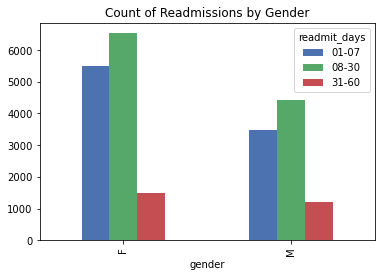

In [14]:
gender_read.plot(kind='bar');
plt.title('Count of Readmissions by Gender');

Females have the highest number of readmissions compared to males, with the majority of readmissions occuring between 8 and 30 days after discharge.

#### Race

In [15]:
df['race_cd'].unique()

array(['White', 'Black', 'Others'], dtype=object)

In [16]:
race = df['race_cd'].value_counts(normalize=True)*100
race.round(2)

White     85.42
Black      9.45
Others     5.13
Name: race_cd, dtype: float64

In [17]:
race_read = pd.crosstab(df.race_cd, df.readmit_days)
race_read

readmit_days,01-07,08-30,31-60
race_cd,,,
Black,1112,677,436
Others,386,819,145
White,7473,9479,2115


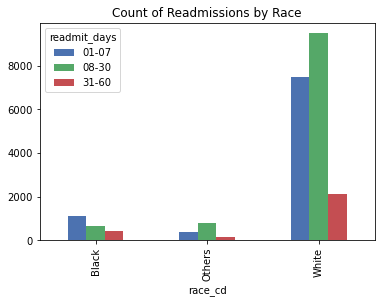

In [18]:
race_read.plot(kind='bar');
plt.title('Count of Readmissions by Race');

People of white ethnicity accounted for the most number of readmissions between 8 and 30 days.

#### Age

In [19]:
df['PatientAge'].describe()

count    146606.000000
mean         74.440848
std          13.267879
min          27.000000
25%          69.000000
50%          76.000000
75%          83.000000
max         101.000000
Name: PatientAge, dtype: float64

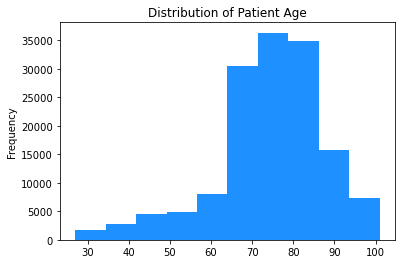

In [20]:
df['PatientAge'].plot(kind='hist', color='dodgerblue');
plt.title('Distribution of Patient Age');

Patient ages ranged from 27 to 101. The average age of patients was 74. Due to the various number of ages, the ages category will be grouped into bins to make it easier for analysis.

#### Diagnosis

In [21]:
df['Diagnosis_Group'].unique()

array(['COPD', 'CHF', 'AMI'], dtype=object)

In [22]:
diag = df['Diagnosis_Group'].value_counts(normalize=True)*100
diag.round(2)

CHF     64.98
AMI     27.38
COPD     7.63
Name: Diagnosis_Group, dtype: float64

In [23]:
ms = df['MS_DRG_DESC'].value_counts(normalize=True)*100
ms.round(2)

HEART FAILURE & SHOCK W CC                                              26.67
HEART FAILURE & SHOCK W MCC                                             26.62
HEART FAILURE & SHOCK W/O CC/MCC                                        11.90
PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT W/O MCC                    4.87
ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE W MCC                      3.76
CHRONIC OBSTRUCTIVE Hosp 46 DISEASE W CC                                 2.80
CHRONIC OBSTRUCTIVE Hosp 46 DISEASE W/O CC/MCC                           2.47
CHRONIC OBSTRUCTIVE Hosp 46 DISEASE W MCC                                2.37
ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE W CC                       2.27
CORONARY BYPASS W CARDIAC CATH W/O MCC                                   2.17
CORONARY BYPASS W CARDIAC CATH W MCC                                     1.98
ACUTE MYOCARDIA INFARCTION, DISCHARGED ALIVE W/O CC/MCC                  1.39
PERC CARDIOVASC PROC W DRUG-ELUTING STENT W/O MCC               

In [24]:
apr = df['DRG_APR_DESC'].value_counts(normalize=True)*100
apr.round(2)

HEART FAILURE                                                             63.93
OTHER PNEUMONIA                                                           23.63
CHRONIC OBSTRUCTIVE Hosp 46 DISEASE                                        6.56
MAJOR RESPIRATORY INFECTIONS & INFLAMMATIONS                               1.55
CYSTIC FIBROSIS - Hosp 46 DISEASE                                          1.37
RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS                0.66
ACUTE MYOCARDIAL INFARCTION                                                0.33
HIV W MAJOR HIV RELATED CONDITION                                          0.27
HIV W ONE SIGNIF HIV COND OR W/O SIGNIF RELATED COND                       0.27
OTHER CIRCULATORY SYSTEM DIAGNOSES                                         0.20
OTHER RESPIRATORY & CHEST PROCEDURES                                       0.20
TRACHEOSTOMY W LONG TERM MECHANICAL VENTILATION W/O EXTENSIVE PROCEDUR     0.13
NODATA                                  

In [25]:
diag_subcat = df['DIAGNOSIS_SUBCAT_DESC'].value_counts(normalize=True)*100
diag_subcat.round(2)

HEART FAILURE               59.91
PNEUMONIA ORGANISM UNSP     22.19
CHRONIC BRONCHITIS           5.29
OTHER BACTERIAL PNEUMONI     2.57
PNEUMOCOCCAL PNEUMONIA       2.04
HYPERTENSIVE HEART AND C     1.98
HYPERTENSIVE HEART DISEA     1.19
OTHER RHEUMATIC HEART DI     1.12
ASTHMA                       0.79
BRONCHIECTASIS               0.69
EMPHYSEMA                    0.56
VIRAL PNEUMONIA              0.39
ACUTE MYOCARDIAL INFARCT     0.33
CHRONIC AIRWAY OBSTRUCTI     0.26
CHRONIC Hosp 46 HEART        0.20
PNEUMONIA DUE TO OTHER S     0.13
SYMPTOMS CONCERNING NUTR     0.07
OTHER AND UNSPECIFIED DI     0.07
SEPTICEMIA                   0.07
BRONCHOPNEUMONIA ORGANI      0.07
DISORDERS OF FLUID ELEC      0.06
DISEASES DUE TO OTHER MY     0.03
Name: DIAGNOSIS_SUBCAT_DESC, dtype: float64

In [26]:
proc_subcat = df['PROCEDURE_SUBCAT_DESC'].value_counts(normalize=True)*100
proc_subcat.round(2)

OTHER DIAGNOSTIC RADIOLO    47.08
OTHER NONOPERATIVE PROCE    17.14
INCISION, EXCISION, AND     11.65
OTHER OPERATIONS ON VESS     5.16
NONOPERATIVE INTUBATION      5.02
OTHER OPERATIONS ON LUNG     4.06
OPERATIONS ON CHEST WALL     2.47
INTERVIEW, EVALUATION, C     2.31
OTHER OPERATIONS ON HEAR     0.82
NUCLEAR MEDICINE             0.81
OPERATIONS ON SPINAL COR     0.58
PROCEDURES RELATED TO TH     0.38
OTHER OPERATIONS ON LARY     0.34
OTHER OPERATIONS ON ABDO     0.29
OPERATIONS ON BONE MARRO     0.29
OPERATIONS ON SKIN AND S     0.29
OPERATIONS ON NOSE           0.20
REPAIR AND PLASTIC OPERA     0.19
PROCEDURES AND INTERVENT     0.19
INCISION AND EXCISION OF     0.15
REPLACEMENT AND REMOVAL      0.10
OPERATIONS ON LYMPHATIC      0.10
OPERATIONS ON RECTUM REC     0.10
OTHER OPERATIONS ON TEET     0.10
OPERATIONS ON ANUS           0.10
OPERATIONS ON LIVER          0.09
Name: PROCEDURE_SUBCAT_DESC, dtype: float64

In [27]:
dx = df['dx_group'].value_counts(normalize=True)*100
dx.round(2)

Congestive heart failure; nonhypertensive [108.]                         61.02
Pneumonia (except that caused by TB or STD) [122.]                       27.41
Obstructive chronic bronchitis                                            5.23
Hypertension with complications and secondary hypertension [99.]          3.17
Other chronic pulmonary disease                                           0.79
Chronic obstructive asthma                                                0.79
Emphysema                                                                 0.53
Acute myocardial infarction [100.]                                        0.33
Chronic airway obstruction; not otherwise specified                       0.26
Pulmonary heart disease [103.]                                            0.20
Other and unspecified metabolic; nutritional; and endocrine disorders     0.13
Septicemia (except in labor) [2.]                                         0.07
Hypopotassemia                                      

In [28]:
pd.crosstab(df['Diagnosis_Group'], df['readmit_days'])

readmit_days,01-07,08-30,31-60
Diagnosis_Group,,,
AMI,3244,3321,725
CHF,5293,7081,1828
COPD,434,573,143


Diagnosis Group CHF - Congestive Heart Failure accounted for the highest number of diagnosis. In addition, CHF and AMI - Acute Myocardial Infarction, diagnosis groups had the highest number of readmissions between 1 and 30 days.

#### Readmits

In [29]:
readmit_day = df['readmit_days'].value_counts(normalize=True)*100
readmit_day.round(2)

08-30    48.47
01-07    39.62
31-60    11.91
Name: readmit_days, dtype: float64

In [30]:
diag_read = pd.crosstab(df.Diagnosis_Group, df.readmit_days)
diag_read

readmit_days,01-07,08-30,31-60
Diagnosis_Group,,,
AMI,3244,3321,725
CHF,5293,7081,1828
COPD,434,573,143


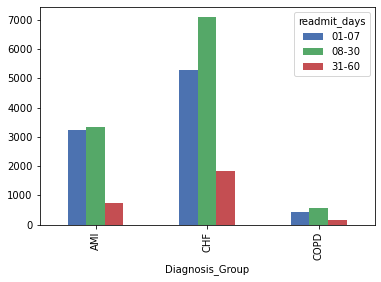

In [31]:
diag_read.plot(kind='bar');

In [32]:
readmit_month = df['readmit_month'].value_counts(normalize=True)*100
readmit_month.round(2)

5.0     12.14
3.0     11.88
6.0     10.24
4.0      9.59
12.0     9.39
1.0      9.16
8.0      7.87
11.0     7.63
10.0     7.03
2.0      6.80
7.0      4.47
9.0      3.80
Name: readmit_month, dtype: float64

In [33]:
df['readmit_number'].unique()

array([0, 1], dtype=int64)

In [34]:
read_num = df['readmit_number'].value_counts(normalize=True)*100
read_num.round(2)

0    84.56
1    15.44
Name: readmit_number, dtype: float64

39% of patients were readmitted within 1 to 7 days, while 48% of patients were readmitted between 8 and 30 days. The majority of patients who were readmitted between 8 and 30 days were readmitted due to Congestive Heart Failure. There was no significant peaks in the months. However, May had the most number of readmissions.

#### Admissions

In [35]:
admit = df['admit_month'].value_counts(normalize=True)*100
admit.round(2)

5     12.16
1     11.49
2     10.88
3     10.24
4      8.99
12     8.68
11     8.65
6      8.40
10     8.27
9      4.33
8      4.16
7      3.75
Name: admit_month, dtype: float64

#### Length of Stay

In [36]:
df['LENGTH_OF_STAY'].describe()

count    146606.000000
mean          5.446094
std           4.102900
min           1.000000
25%           3.000000
50%           4.000000
75%           7.000000
max          32.000000
Name: LENGTH_OF_STAY, dtype: float64

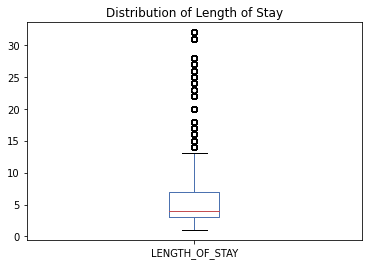

In [37]:
df['LENGTH_OF_STAY'].plot(kind='box');
plt.title('Distribution of Length of Stay');

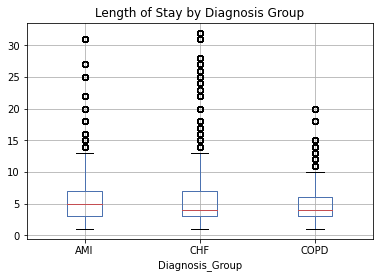

In [38]:
df.boxplot(column = 'LENGTH_OF_STAY', by = 'Diagnosis_Group');
plt.suptitle('');
plt.title('Length of Stay by Diagnosis Group');

In [39]:
df.groupby("HOSPITAL")["LENGTH_OF_STAY"].describe()

,count,mean,std,min,25%,50%,75%,max
HOSPITAL,,,,,,,,
Delaware County Hospital,1446.0,3.233057,1.519984,1.0,2.0,4.0,4.0,6.0
Hilding-Long Memorial Hospital,18109.0,5.776686,4.409529,1.0,3.0,5.0,7.0,28.0
Independence Medical Center,5787.0,5.332469,4.307373,1.0,2.0,4.0,6.0,18.0
Mercy Hospital,34840.0,5.257233,3.702523,1.0,3.0,4.0,7.0,26.0
Oxbow Regional Hospital,9133.0,4.795905,4.210820,1.0,3.0,3.0,6.0,32.0
St. Anthony Medical Center,69577.0,5.675266,4.057550,1.0,3.0,5.0,7.0,31.0
Superior-Parkland Hospital,5113.0,3.627420,2.168257,1.0,2.0,3.0,4.0,10.0
Valley City Regional Hospital,2601.0,6.885044,7.743946,1.0,2.0,4.0,8.0,31.0


In [40]:
length_read = pd.crosstab(df.LENGTH_OF_STAY, df.readmit_days)
length_read

readmit_days,01-07,08-30,31-60
LENGTH_OF_STAY,,,
1,721,239,533
2,2226,1831,142
3,1061,1833,581
4,674,2069,385
5,1351,961,146
6,676,966,477
7,385,675,144
8,580,720,193
9,577,239,0


The average length of stay for patients was 5 days. However, some patients stayed a max of 32 days. 2,226 patients who had a length of stay of at least 2 days, were readmitted between 1 and 7 days after discharge. 2,069 patients who had a length of stay of at least 4 days, were readmitted between 8 and 30 days after discharge.

#### Hospital

In [41]:
df['HOSPITAL'].unique()

array(['Delaware County Hospital', 'Hilding-Long Memorial Hospital',
       'Independence Medical Center', 'Mercy Hospital',
       'Oxbow Regional Hospital', 'St. Anthony Medical Center',
       'Superior-Parkland Hospital', 'Valley City Regional Hospital'],
      dtype=object)

In [42]:
hospital = df['HOSPITAL'].value_counts(normalize=True)*100
hospital.round(2)

St. Anthony Medical Center        47.46
Mercy Hospital                    23.76
Hilding-Long Memorial Hospital    12.35
Oxbow Regional Hospital            6.23
Independence Medical Center        3.95
Superior-Parkland Hospital         3.49
Valley City Regional Hospital      1.77
Delaware County Hospital           0.99
Name: HOSPITAL, dtype: float64

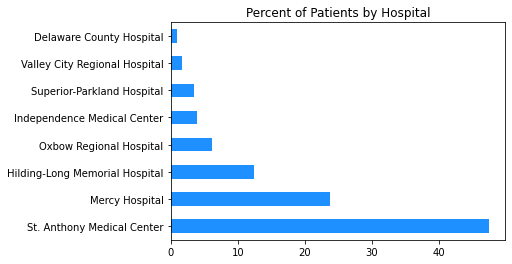

In [43]:
hospital.plot(kind='barh',color='dodgerblue');
plt.title('Percent of Patients by Hospital');

In [44]:
doctor = df['DOCTOR'].value_counts(normalize=True)*100
doctor.round(2)

235415    15.40
262051    10.41
202927     7.56
275709     7.11
220194     3.94
          ...  
311772     0.06
276404     0.06
302999     0.03
317267     0.03
245283     0.03
Name: DOCTOR, Length: 99, dtype: float64

In [45]:
nurse = df['Disch_Nurse_ID'].value_counts(normalize=True)*100
nurse.round(2)

100292    3.71
190916    2.95
4002      2.87
14006     2.81
23009     2.79
          ... 
275543    0.03
230231    0.03
165817    0.02
399485    0.02
19007     0.02
Name: Disch_Nurse_ID, Length: 93, dtype: float64

In [46]:
pd.crosstab(df.HOSPITAL, df.readmit_days)

readmit_days,01-07,08-30,31-60
HOSPITAL,,,
Delaware County Hospital,0,196,0
Hilding-Long Memorial Hospital,435,964,144
Independence Medical Center,97,0,0
Mercy Hospital,3190,5187,1732
Oxbow Regional Hospital,384,441,97
St. Anthony Medical Center,4090,3703,723
Superior-Parkland Hospital,194,97,0
Valley City Regional Hospital,581,387,0


St. Anthony Medical Center accounted for the most number of patients. However, Mercy Hospital had the most number of readmissions.

#### Location

In [47]:
state = df['STATECODE'].value_counts(normalize=True)*100
state.round(2)

MN    83.58
WI     9.72
IA     4.93
ND     1.77
Name: STATECODE, dtype: float64

In [48]:
city = df['City'].value_counts(normalize=True)*100
city.round(2)

Minneapolis    47.46
Bloomington    23.76
Park Rapids    12.35
Eau Claire      6.23
Waterloo        3.95
Parkland        3.49
Valley City     1.77
Manchester      0.99
Name: City, dtype: float64

In [49]:
zip = df['ZIP'].value_counts(normalize=True)*100
zip.round(2)

55406    47.46
55437    23.76
56470    12.35
54702     6.23
50644     3.95
54874     3.49
58072     1.77
52057     0.99
Name: ZIP, dtype: float64

In [50]:
country = df['County_name'].value_counts(normalize=True)*100
country.round(2)

Hennepin      71.22
Hubbard       12.35
Eau Claire     6.23
Black Hawk     3.95
Douglas        3.49
Barnes         1.77
Delaware       0.99
Name: County_name, dtype: float64

Minnesota had the most number of patients, accounting for 83% of patients. However, within the state of Minnesota, Minneapolis accounted for 47% of these patients.

#### ICU

In [51]:
df['ICU_DAYS'].describe()

count    146606.000000
mean          2.785398
std           3.832078
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          29.000000
Name: ICU_DAYS, dtype: float64

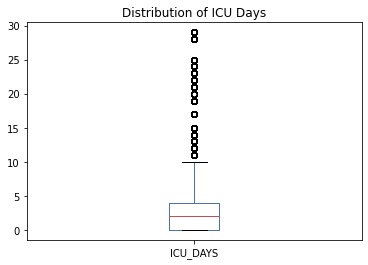

In [52]:
df['ICU_DAYS'].plot(kind='box');
plt.title('Distribution of ICU Days');

Patients in ICU spent an average of 2.7 days in ICU, with a max of 29 days. 

#### Discharge

In [53]:
discharge = df['DISCHARGED_TO'].value_counts(normalize=True)*100
discharge.round(2)

ROUTINE DSCHG, HOME         62.54
HOME HEALTH AGENCY          18.04
SKILLED NURSING FACILITY    10.90
OTHER DEATH                  3.52
HOSPICE (HOME)               1.87
INTERMEDIATE CARE            1.35
AGNST MEDICAL ADVICE AMA     0.82
CHG TO LTAC                  0.39
OTHER ACUTE HOSP             0.30
HOSPICE - MEDICAL INPAT      0.14
REHAB HOSPITAL               0.13
Name: DISCHARGED_TO, dtype: float64

In [54]:
pd.crosstab(df.DISCHARGED_TO, df.readmit_days)

readmit_days,01-07,08-30,31-60
DISCHARGED_TO,,,
AGNST MEDICAL ADVICE AMA,96,97,97
CHG TO LTAC,48,0,0
HOME HEALTH AGENCY,1543,1296,191
HOSPICE (HOME),96,193,96
INTERMEDIATE CARE,245,142,50
OTHER DEATH,240,431,98
REHAB HOSPITAL,0,145,0
"ROUTINE DSCHG, HOME",5639,6987,2068
SKILLED NURSING FACILITY,1064,1684,96


Most patients were discharged to their homes. Also, patients who were discharged to their home had the highest number of readmissions.

#### Chronic Conditions

In [55]:
df['Num_Chronic_Cond'].describe()

count    146413.000000
mean          1.018550
std           0.937125
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: Num_Chronic_Cond, dtype: float64

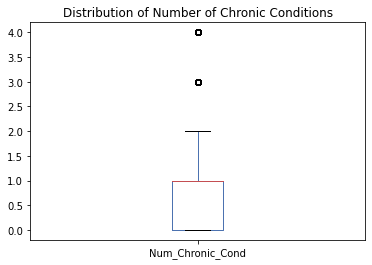

In [56]:
df['Num_Chronic_Cond'].plot(kind='box');
plt.title('Distribution of Number of Chronic Conditions');

In [57]:
pd.crosstab(df.Num_Chronic_Cond, df.readmit_days)

readmit_days,01-07,08-30,31-60
Num_Chronic_Cond,,,
0.0,632,529,49
1.0,1832,1823,626
2.0,2748,3508,961
3.0,2316,3476,576
4.0,1443,1639,484


The average number of chronic conditions for a patient was 1. However, patients with chronic conditions seem to have a high number of readmissions accross the board.

#### DRG_APR_Severity

In [58]:
df['DRG_APR_SEVERITY'].value_counts(normalize=True)*100

3.0    43.151223
2.0    41.442358
4.0     8.749906
1.0     6.656513
Name: DRG_APR_SEVERITY, dtype: float64

In [59]:
sev_diag = pd.crosstab(df['DRG_APR_SEVERITY'], df['Diagnosis_Group'])
sev_diag

Diagnosis_Group,AMI,CHF,COPD
DRG_APR_SEVERITY,,,
1.0,3095,5396,1255
2.0,14393,41030,5254
3.0,17548,41380,4251
4.0,5107,7271,433


In [60]:
sev_read = pd.crosstab(df['DRG_APR_SEVERITY'], df['readmit_days'])
sev_read

readmit_days,01-07,08-30,31-60
DRG_APR_SEVERITY,,,
1.0,339,723,0
2.0,3480,4867,1400
3.0,4334,4475,1151
4.0,818,910,49


Patients whose diagnosis was associated with a severity level of 2 or 3 had the highest number of readmissions between 1 and 30 days.

## Data Cleansing

### Handle Missing Values

Although, there are 84% missing values with readmit dates, this is most likely because a patient was never readmitted. Therefore, we can assume the missing data is valid and can be coded as missing. In addition, there's a possiblity that procedure codes are missing because no procedure was performed on the patient. Therefore, these will be coded as missing as well.

In [61]:
missing_cols = ['PROCEDURE_SUBCAT_CODE', 'PROCEDURE_SUBCAT_DESC', 'PROCEDURE_ICD_CODE', 'PROCEDURE_LONG_DESC',
                'readmit_date','readmit_discharge_date','readmit_days','readmit_month']

In [62]:
df[missing_cols] = df[missing_cols].fillna(value='M', axis=1)

There was a very small percentage of missing values for patients with chronic conditions. This is possible because not all patients have chronic conditions. Therefore, the missing values will be replaced with 0.

In [63]:
df['Num_Chronic_Cond'] = df['Num_Chronic_Cond'].fillna(value=0, axis=0)

There was also a small percentage of patients with missing values for the DRG_APR_SEVERITY. This variable indicates the severity of the illness. We could assume that each illness should have a level of severity attached. However, making an assumption of what the severity should be could be misleading, depending on the similar diagnosis. Therefore, these will be coded as missing. 

In [64]:
df['DRG_APR_SEVERITY'].unique()

array([ 1.,  2.,  4.,  3., nan])

In [65]:
df['DRG_APR_SEVERITY'] = df['DRG_APR_SEVERITY'].fillna(value='M', axis=0)

In [66]:
df['DRG_APR_SEVERITY'].unique()

array([1.0, 2.0, 4.0, 3.0, 'M'], dtype=object)

In [67]:
df.isnull().sum()

ENCOUNTER_KEY             0
PATIENT_NUMBER            0
gender                    0
race_cd                   0
PatientAge                0
Diagnosis_Group           0
icd9_target               0
MS_DRG_CODE               0
MS_DRG_DESC               0
DRG_APR_CODE              0
DRG_APR_DESC              0
DRG_APR_SEVERITY          0
DIAGNOSIS_SUBCAT_CODE     0
DIAGNOSIS_SUBCAT_DESC     0
DIAGNOSIS_ICD_CODE        0
DIAGNOSIS_LONG_DESC       0
PROCEDURE_SUBCAT_CODE     0
PROCEDURE_SUBCAT_DESC     0
PROCEDURE_ICD_CODE        0
PROCEDURE_LONG_DESC       0
dx_code                   0
dx_group                  0
DOCTOR                    0
ADMIT_DATE                0
DISCHARGE_DATE            0
readmit_date              0
readmit_discharge_date    0
readmit_days              0
LENGTH_OF_STAY            0
ICU_DAYS                  0
DISCHARGED_TO             0
op_visits6                0
Standard_Orders_Used      0
Num_Chronic_Cond          0
Disch_Nurse_ID            0
admit_month         

### Collapse Variables

#### Age

In [68]:
df['PatientAge'].describe()

count    146606.000000
mean         74.440848
std          13.267879
min          27.000000
25%          69.000000
50%          76.000000
75%          83.000000
max         101.000000
Name: PatientAge, dtype: float64

In [69]:
bins = [20,40,60,80,101]

In [70]:
labels = ['20-39', '40-59', '60-79', '80-101']

In [71]:
df['PatientAge_Bins'] = pd.cut(df['PatientAge'], bins, labels = labels)

In [72]:
df['PatientAge_Bins'].value_counts()

60-79     78868
80-101    48943
40-59     14984
20-39      3811
Name: PatientAge_Bins, dtype: int64

#### Length_of_Stay

In [73]:
df['LENGTH_OF_STAY'].describe()

count    146606.000000
mean          5.446094
std           4.102900
min           1.000000
25%           3.000000
50%           4.000000
75%           7.000000
max          32.000000
Name: LENGTH_OF_STAY, dtype: float64

In [74]:
bins = [1,10,20,30]

In [75]:
labels = ['1-9', '10-19','20-32']

In [76]:
df['LENGTH_OF_STAY_Bins'] = pd.cut(df['LENGTH_OF_STAY'], bins, labels = labels)

In [77]:
df['LENGTH_OF_STAY_Bins'].value_counts()

1-9      124431
10-19     11906
20-32      1391
Name: LENGTH_OF_STAY_Bins, dtype: int64

### Create Dummies
For features that contained missing values, which a category was created to track the missing values as missing, these categories were dropped from the dataframe, once dummy variables was created. In some cases, an additional column was also dropped, since the other columns captured the information needed about the feature.

#### Patient Age

In [78]:
patient_age_dummies = pd.get_dummies(df['PatientAge_Bins'],prefix = 'PatientAge_Bins')

In [79]:
patient_age_dummies.columns

Index(['PatientAge_Bins_20-39', 'PatientAge_Bins_40-59',
       'PatientAge_Bins_60-79', 'PatientAge_Bins_80-101'],
      dtype='object')

In [80]:
df = df.join(patient_age_dummies)

In [81]:
patient_age_dummies.sample(n=5, random_state=1)

,PatientAge_Bins_20-39,PatientAge_Bins_40-59,PatientAge_Bins_60-79,PatientAge_Bins_80-101
79915,0,0,0,1
73042,0,0,1,0
52727,0,0,1,0
127994,0,1,0,0
76754,0,0,1,0


#### Length of Stay

In [82]:
length_of_stay_dummies = pd.get_dummies(df['LENGTH_OF_STAY_Bins'],prefix= 'LENGTH_OF_STAY_Bins')

In [83]:
length_of_stay_dummies.columns

Index(['LENGTH_OF_STAY_Bins_1-9', 'LENGTH_OF_STAY_Bins_10-19',
       'LENGTH_OF_STAY_Bins_20-32'],
      dtype='object')

In [84]:
df = df.join(length_of_stay_dummies)

In [85]:
length_of_stay_dummies.sample(n=5, random_state=1)

,LENGTH_OF_STAY_Bins_1-9,LENGTH_OF_STAY_Bins_10-19,LENGTH_OF_STAY_Bins_20-32
79915,1,0,0
73042,0,0,1
52727,0,1,0
127994,1,0,0
76754,0,1,0


#### readmit_days

Hospital readmissions is when patients are admitted back to the hospital after being discharged. CMS constitutes a readmission  between 1 and 30 days from the same or another acute care hospital. Readmissions during this window are considered avoidable. Therefore, CMS Hospital Readmissions Reduction Program encourages hospitals to reduce avoidable readmissions, by linking payment to the quality of care.

In [86]:
df['readmit_days'].value_counts()

M        123964
08-30     10975
01-07      8971
31-60      2696
Name: readmit_days, dtype: int64

In [87]:
readmit_days_dummies = pd.get_dummies(df['readmit_days'],prefix = 'readmit_days')

In [88]:
readmit_days_dummies.columns

Index(['readmit_days_01-07', 'readmit_days_08-30', 'readmit_days_31-60',
       'readmit_days_M'],
      dtype='object')

In [89]:
readmit_days_dummies.drop('readmit_days_M', axis=1, inplace=True)

In [90]:
df = df.join(readmit_days_dummies)

In [91]:
readmit_days_dummies.sample(n=5, random_state=1)

,readmit_days_01-07,readmit_days_08-30,readmit_days_31-60
79915,0,0,0
73042,0,0,0
52727,0,0,0
127994,0,0,0
76754,0,0,0


#### gender

In [92]:
gender_dummies = pd.get_dummies(df['gender'],prefix = 'gender')

In [93]:
gender_dummies.columns

Index(['gender_F', 'gender_M'], dtype='object')

In [94]:
gender_dummies.drop("gender_M", axis=1, inplace=True)

In [95]:
df = df.join(gender_dummies)

In [96]:
gender_dummies.sample(n=5, random_state=1)

,gender_F
79915,1
73042,1
52727,1
127994,1
76754,1


#### race_cd

In [97]:
race_dummies = pd.get_dummies(df['race_cd'],prefix = 'race')

In [98]:
race_dummies.columns

Index(['race_Black', 'race_Others', 'race_White'], dtype='object')

In [99]:
race_dummies.drop("race_Others", axis=1, inplace=True)

In [100]:
df = df.join(race_dummies)

In [101]:
race_dummies.sample(n=5, random_state=1)

,race_Black,race_White
79915,0,1
73042,0,1
52727,0,1
127994,0,1
76754,0,1


#### Diagnosis Group

In [102]:
dg_dummies = pd.get_dummies(df['Diagnosis_Group'],prefix = 'Diagnosis_Group')

In [103]:
dg_dummies.columns

Index(['Diagnosis_Group_AMI', 'Diagnosis_Group_CHF', 'Diagnosis_Group_COPD'], dtype='object')

In [104]:
dg_dummies.drop("Diagnosis_Group_AMI", axis=1, inplace=True)

In [105]:
df = df.join(dg_dummies)

In [106]:
dg_dummies.sample(n=5, random_state=1)

,Diagnosis_Group_CHF,Diagnosis_Group_COPD
79915,0,1
73042,0,0
52727,0,0
127994,0,1
76754,1,0


#### DRG APR Severity

In [107]:
severity_dummies = pd.get_dummies(df['DRG_APR_SEVERITY'],prefix = 'DRG_APR_SEVERITY')

In [108]:
severity_dummies.columns

Index(['DRG_APR_SEVERITY_1.0', 'DRG_APR_SEVERITY_2.0', 'DRG_APR_SEVERITY_3.0',
       'DRG_APR_SEVERITY_4.0', 'DRG_APR_SEVERITY_M'],
      dtype='object')

In [109]:
severity_dummies.drop("DRG_APR_SEVERITY_M", axis=1, inplace=True)

In [110]:
df = df.join(severity_dummies)

In [111]:
severity_dummies.sample(n=5, random_state=1)

,DRG_APR_SEVERITY_1.0,DRG_APR_SEVERITY_2.0,DRG_APR_SEVERITY_3.0,DRG_APR_SEVERITY_4.0
79915,0,0,1,0
73042,0,1,0,0
52727,0,0,1,0
127994,0,1,0,0
76754,0,0,0,1


#### Discharged to

In [112]:
discharged_dummies = pd.get_dummies(df['DISCHARGED_TO'],prefix = 'DISCHARGED_TO')

In [113]:
discharged_dummies.columns

Index(['DISCHARGED_TO_AGNST MEDICAL ADVICE AMA', 'DISCHARGED_TO_CHG TO LTAC',
       'DISCHARGED_TO_HOME HEALTH AGENCY', 'DISCHARGED_TO_HOSPICE (HOME)',
       'DISCHARGED_TO_HOSPICE - MEDICAL INPAT',
       'DISCHARGED_TO_INTERMEDIATE CARE', 'DISCHARGED_TO_OTHER ACUTE HOSP',
       'DISCHARGED_TO_OTHER DEATH', 'DISCHARGED_TO_REHAB HOSPITAL',
       'DISCHARGED_TO_ROUTINE DSCHG, HOME',
       'DISCHARGED_TO_SKILLED NURSING FACILITY'],
      dtype='object')

In [114]:
df = df.join(discharged_dummies)

In [115]:
discharged_dummies.sample(n=5, random_state=1)

,DISCHARGED_TO_AGNST MEDICAL ADVICE AMA,DISCHARGED_TO_CHG TO LTAC,DISCHARGED_TO_HOME HEALTH AGENCY,DISCHARGED_TO_HOSPICE (HOME),DISCHARGED_TO_HOSPICE - MEDICAL INPAT,DISCHARGED_TO_INTERMEDIATE CARE,DISCHARGED_TO_OTHER ACUTE HOSP,DISCHARGED_TO_OTHER DEATH,DISCHARGED_TO_REHAB HOSPITAL,"DISCHARGED_TO_ROUTINE DSCHG, HOME",DISCHARGED_TO_SKILLED NURSING FACILITY
79915,0,0,1,0,0,0,0,0,0,0,0
73042,0,0,0,0,0,0,0,0,0,1,0
52727,0,0,0,0,0,0,0,0,0,0,1
127994,0,0,0,0,0,0,0,0,0,1,0
76754,0,0,1,0,0,0,0,0,0,0,0


#### Readmit Month

In [116]:
readmit_dummies = pd.get_dummies(df['readmit_month'],prefix = 'readmit_month')

In [117]:
readmit_dummies.columns

Index(['readmit_month_1.0', 'readmit_month_2.0', 'readmit_month_3.0',
       'readmit_month_4.0', 'readmit_month_5.0', 'readmit_month_6.0',
       'readmit_month_7.0', 'readmit_month_8.0', 'readmit_month_9.0',
       'readmit_month_10.0', 'readmit_month_11.0', 'readmit_month_12.0',
       'readmit_month_M'],
      dtype='object')

In [118]:
readmit_dummies.drop("readmit_month_M", axis=1, inplace=True)

In [119]:
df = df.join(readmit_dummies)

In [120]:
readmit_dummies.sample(n=5, random_state=1)

,readmit_month_1.0,readmit_month_2.0,readmit_month_3.0,readmit_month_4.0,readmit_month_5.0,readmit_month_6.0,readmit_month_7.0,readmit_month_8.0,readmit_month_9.0,readmit_month_10.0,readmit_month_11.0,readmit_month_12.0
79915,0,0,0,0,0,0,0,0,0,0,0,0
73042,0,0,0,0,0,0,0,0,0,0,0,0
52727,0,0,0,0,0,0,0,0,0,0,0,0
127994,0,0,0,0,0,0,0,0,0,0,0,0
76754,0,0,0,0,0,0,0,0,0,0,0,0


#### Hospital

In [121]:
hospital_dummies = pd.get_dummies(df['HOSPITAL'],prefix = 'HOSPITAL')

In [122]:
hospital_dummies.columns

Index(['HOSPITAL_Delaware County Hospital',
       'HOSPITAL_Hilding-Long Memorial Hospital',
       'HOSPITAL_Independence Medical Center', 'HOSPITAL_Mercy Hospital',
       'HOSPITAL_Oxbow Regional Hospital',
       'HOSPITAL_St. Anthony Medical Center',
       'HOSPITAL_Superior-Parkland Hospital',
       'HOSPITAL_Valley City Regional Hospital'],
      dtype='object')

In [123]:
df = df.join(hospital_dummies)

In [124]:
hospital_dummies.sample(n=5, random_state=1)

,HOSPITAL_Delaware County Hospital,HOSPITAL_Hilding-Long Memorial Hospital,HOSPITAL_Independence Medical Center,HOSPITAL_Mercy Hospital,HOSPITAL_Oxbow Regional Hospital,HOSPITAL_St. Anthony Medical Center,HOSPITAL_Superior-Parkland Hospital,HOSPITAL_Valley City Regional Hospital
79915,0,0,0,0,0,1,0,0
73042,0,0,0,0,0,1,0,0
52727,0,0,0,1,0,0,0,0
127994,0,0,0,0,0,1,0,0
76754,0,0,0,0,0,1,0,0


#### State cd

In [125]:
state_dummies = pd.get_dummies(df['STATECODE'],prefix = 'STATECODE')

In [126]:
state_dummies.columns

Index(['STATECODE_IA', 'STATECODE_MN', 'STATECODE_ND', 'STATECODE_WI'], dtype='object')

In [127]:
df = df.join(state_dummies)

In [128]:
state_dummies.sample(n=5, random_state=1)

,STATECODE_IA,STATECODE_MN,STATECODE_ND,STATECODE_WI
79915,0,1,0,0
73042,0,1,0,0
52727,0,1,0,0
127994,0,1,0,0
76754,0,1,0,0


#### Diagnosis Subcat Desc

In [129]:
diag_subcat_dummies = pd.get_dummies(df['DIAGNOSIS_SUBCAT_DESC'],prefix = 'DIAGNOSIS_SUBCAT_DESC')

In [130]:
diag_subcat_dummies.columns

Index(['DIAGNOSIS_SUBCAT_DESC_ACUTE MYOCARDIAL INFARCT',
       'DIAGNOSIS_SUBCAT_DESC_ASTHMA', 'DIAGNOSIS_SUBCAT_DESC_BRONCHIECTASIS',
       'DIAGNOSIS_SUBCAT_DESC_BRONCHOPNEUMONIA ORGANI',
       'DIAGNOSIS_SUBCAT_DESC_CHRONIC AIRWAY OBSTRUCTI',
       'DIAGNOSIS_SUBCAT_DESC_CHRONIC BRONCHITIS',
       'DIAGNOSIS_SUBCAT_DESC_CHRONIC Hosp 46 HEART',
       'DIAGNOSIS_SUBCAT_DESC_DISEASES DUE TO OTHER MY',
       'DIAGNOSIS_SUBCAT_DESC_DISORDERS OF FLUID ELEC',
       'DIAGNOSIS_SUBCAT_DESC_EMPHYSEMA',
       'DIAGNOSIS_SUBCAT_DESC_HEART FAILURE',
       'DIAGNOSIS_SUBCAT_DESC_HYPERTENSIVE HEART AND C',
       'DIAGNOSIS_SUBCAT_DESC_HYPERTENSIVE HEART DISEA',
       'DIAGNOSIS_SUBCAT_DESC_OTHER AND UNSPECIFIED DI',
       'DIAGNOSIS_SUBCAT_DESC_OTHER BACTERIAL PNEUMONI',
       'DIAGNOSIS_SUBCAT_DESC_OTHER RHEUMATIC HEART DI',
       'DIAGNOSIS_SUBCAT_DESC_PNEUMOCOCCAL PNEUMONIA',
       'DIAGNOSIS_SUBCAT_DESC_PNEUMONIA DUE TO OTHER S',
       'DIAGNOSIS_SUBCAT_DESC_PNEUMONIA ORGANISM

In [131]:
df = df.join(diag_subcat_dummies)

In [132]:
diag_subcat_dummies.sample(n=5, random_state=1)

,DIAGNOSIS_SUBCAT_DESC_ACUTE MYOCARDIAL INFARCT,DIAGNOSIS_SUBCAT_DESC_ASTHMA,DIAGNOSIS_SUBCAT_DESC_BRONCHIECTASIS,DIAGNOSIS_SUBCAT_DESC_BRONCHOPNEUMONIA ORGANI,DIAGNOSIS_SUBCAT_DESC_CHRONIC AIRWAY OBSTRUCTI,DIAGNOSIS_SUBCAT_DESC_CHRONIC BRONCHITIS,DIAGNOSIS_SUBCAT_DESC_CHRONIC Hosp 46 HEART,DIAGNOSIS_SUBCAT_DESC_DISEASES DUE TO OTHER MY,DIAGNOSIS_SUBCAT_DESC_DISORDERS OF FLUID ELEC,DIAGNOSIS_SUBCAT_DESC_EMPHYSEMA,DIAGNOSIS_SUBCAT_DESC_HEART FAILURE,DIAGNOSIS_SUBCAT_DESC_HYPERTENSIVE HEART AND C,DIAGNOSIS_SUBCAT_DESC_HYPERTENSIVE HEART DISEA,DIAGNOSIS_SUBCAT_DESC_OTHER AND UNSPECIFIED DI,DIAGNOSIS_SUBCAT_DESC_OTHER BACTERIAL PNEUMONI,DIAGNOSIS_SUBCAT_DESC_OTHER RHEUMATIC HEART DI,DIAGNOSIS_SUBCAT_DESC_PNEUMOCOCCAL PNEUMONIA,DIAGNOSIS_SUBCAT_DESC_PNEUMONIA DUE TO OTHER S,DIAGNOSIS_SUBCAT_DESC_PNEUMONIA ORGANISM UNSP,DIAGNOSIS_SUBCAT_DESC_SEPTICEMIA,DIAGNOSIS_SUBCAT_DESC_SYMPTOMS CONCERNING NUTR,DIAGNOSIS_SUBCAT_DESC_VIRAL PNEUMONIA
79915,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
52727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
127994,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76754,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Print the new data

In [133]:
df.head()

,ENCOUNTER_KEY,PATIENT_NUMBER,gender,race_cd,PatientAge,Diagnosis_Group,icd9_target,MS_DRG_CODE,MS_DRG_DESC,DRG_APR_CODE,DRG_APR_DESC,DRG_APR_SEVERITY,DIAGNOSIS_SUBCAT_CODE,DIAGNOSIS_SUBCAT_DESC,DIAGNOSIS_ICD_CODE,DIAGNOSIS_LONG_DESC,PROCEDURE_SUBCAT_CODE,PROCEDURE_SUBCAT_DESC,PROCEDURE_ICD_CODE,PROCEDURE_LONG_DESC,dx_code,dx_group,DOCTOR,ADMIT_DATE,DISCHARGE_DATE,readmit_date,readmit_discharge_date,readmit_days,LENGTH_OF_STAY,ICU_DAYS,DISCHARGED_TO,op_visits6,Standard_Orders_Used,Num_Chronic_Cond,Disch_Nurse_ID,admit_month,readmit_month,order_set_used,order_total_charges,readmit_number,operationcount,HOSPITAL,ZIP,STATECODE,City,County_name,i,PatientAge_Bins,LENGTH_OF_STAY_Bins,PatientAge_Bins_20-39,PatientAge_Bins_40-59,PatientAge_Bins_60-79,PatientAge_Bins_80-101,LENGTH_OF_STAY_Bins_1-9,LENGTH_OF_STAY_Bins_10-19,LENGTH_OF_STAY_Bins_20-32,readmit_days_01-07,readmit_days_08-30,readmit_days_31-60,gender_F,race_Black,race_White,Diagnosis_Group_CHF,Diagnosis_Group_COPD,DRG_APR_SEVERITY_1.0,DRG_APR_SEVERITY_2.0,DRG_APR_SEVERITY_3.0,DRG_APR_SEVERITY_4.0,DISCHARGED_TO_AGNST MEDICAL ADVICE AMA,DISCHARGED_TO_CHG TO LTAC,DISCHARGED_TO_HOME HEALTH AGENCY,DISCHARGED_TO_HOSPICE (HOME),DISCHARGED_TO_HOSPICE - MEDICAL INPAT,DISCHARGED_TO_INTERMEDIATE CARE,DISCHARGED_TO_OTHER ACUTE HOSP,DISCHARGED_TO_OTHER DEATH,DISCHARGED_TO_REHAB HOSPITAL,"DISCHARGED_TO_ROUTINE DSCHG, HOME",DISCHARGED_TO_SKILLED NURSING FACILITY,readmit_month_1.0,readmit_month_2.0,readmit_month_3.0,readmit_month_4.0,readmit_month_5.0,readmit_month_6.0,readmit_month_7.0,readmit_month_8.0,readmit_month_9.0,readmit_month_10.0,readmit_month_11.0,readmit_month_12.0,HOSPITAL_Delaware County Hospital,HOSPITAL_Hilding-Long Memorial Hospital,HOSPITAL_Independence Medical Center,HOSPITAL_Mercy Hospital,HOSPITAL_Oxbow Regional Hospital,HOSPITAL_St. Anthony Medical Center,HOSPITAL_Superior-Parkland Hospital,HOSPITAL_Valley City Regional Hospital,STATECODE_IA,STATECODE_MN,STATECODE_ND,STATECODE_WI,DIAGNOSIS_SUBCAT_DESC_ACUTE MYOCARDIAL INFARCT,DIAGNOSIS_SUBCAT_DESC_ASTHMA,DIAGNOSIS_SUBCAT_DESC_BRONCHIECTASIS,DIAGNOSIS_SUBCAT_DESC_BRONCHOPNEUMONIA ORGANI,DIAGNOSIS_SUBCAT_DESC_CHRONIC AIRWAY OBSTRUCTI,DIAGNOSIS_SUBCAT_DESC_CHRONIC BRONCHITIS,DIAGNOSIS_SUBCAT_DESC_CHRONIC Hosp 46 HEART,DIAGNOSIS_SUBCAT_DESC_DISEASES DUE TO OTHER MY,DIAGNOSIS_SUBCAT_DESC_DISORDERS OF FLUID ELEC,DIAGNOSIS_SUBCAT_DESC_EMPHYSEMA,DIAGNOSIS_SUBCAT_DESC_HEART FAILURE,DIAGNOSIS_SUBCAT_DESC_HYPERTENSIVE HEART AND C,DIAGNOSIS_SUBCAT_DESC_HYPERTENSIVE HEART DISEA,DIAGNOSIS_SUBCAT_DESC_OTHER AND UNSPECIFIED DI,DIAGNOSIS_SUBCAT_DESC_OTHER BACTERIAL PNEUMONI,DIAGNOSIS_SUBCAT_DESC_OTHER RHEUMATIC HEART DI,DIAGNOSIS_SUBCAT_DESC_PNEUMOCOCCAL PNEUMONIA,DIAGNOSIS_SUBCAT_DESC_PNEUMONIA DUE TO OTHER S,DIAGNOSIS_SUBCAT_DESC_PNEUMONIA ORGANISM UNSP,DIAGNOSIS_SUBCAT_DESC_SEPTICEMIA,DIAGNOSIS_SUBCAT_DESC_SYMPTOMS CONCERNING NUTR,DIAGNOSIS_SUBCAT_DESC_VIRAL PNEUMONIA
0,105241297,9921901297,M,White,50,COPD,0,192,CHRONIC OBSTRUCTIVE Hosp 46 DISEASE W/O CC/MCC,140,CHRONIC OBSTRUCTIVE Hosp 46 DISEASE,1,491,CHRONIC BRONCHITIS,491.21,OBSTRUCTIVE CHRONIC BRONCHITIS WITH ACUTE EXAC...,99,OTHER NONOPERATIVE PROCE,99.23,INJECTION OF STEROID,49121,Obstructive chronic bronchitis,303334,2014-12-15,2014-12-21,M,M,M,6,4,"ROUTINE DSCHG, HOME",8,Y,1.0,350014,12,M,1,29507,0,0,Delaware County Hospital,52057,IA,Manchester,Delaware,5,40-59,1-9,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,105241793,9921901793,M,White,52,CHF,1,293,HEART FAILURE & SHOCK W/O CC/MCC,194,HEART FAILURE,2,428,HEART FAILURE,428.43,ACUTE ON CHRONIC COMBINED SYSTOLIC AND DIASTOL...,M,M,M,M,42843,Congestive heart failure; nonhypertensive [108.],292722,2015-05-17,2015-05-19,M,M,M,2,0,"ROUTINE DSCHG, HOME",4,Y,1.0,350014,5,M,1,23526,0,1,Delaware County Hospital,52057,IA,Manchester,Delaware,5,40-59,1-9,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

## Check for Multicollinearity

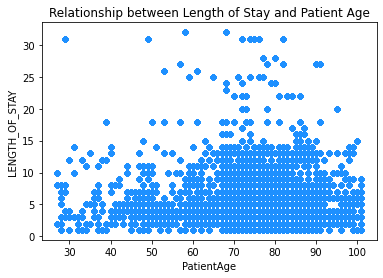

In [134]:
df.plot(kind='scatter', x='PatientAge', y='LENGTH_OF_STAY', color='dodgerblue');
plt.title('Relationship between Length of Stay and Patient Age');

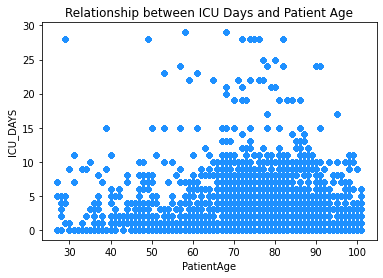

In [135]:
df.plot(kind='scatter', x='PatientAge', y='ICU_DAYS', color='dodgerblue');
plt.title('Relationship between ICU Days and Patient Age');

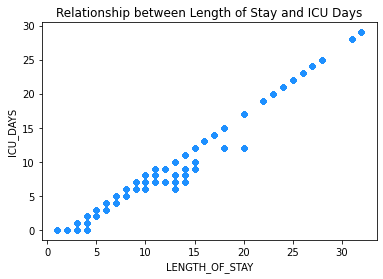

In [136]:
df.plot(kind='scatter', x='LENGTH_OF_STAY', y='ICU_DAYS', color='dodgerblue');
plt.title('Relationship between Length of Stay and ICU Days');

There is no relationship between patient age and length of stay or patient age and ICU days. However, there is a positive relationship between ICU days and length of stay, meaning as ICU days increase, so does the length of stay for a patient. However, we will check the correlation coefficient to determine the strength of the relationship.

                           LENGTH_OF_STAY_Bins_1-9  LENGTH_OF_STAY_Bins_10-19  \
LENGTH_OF_STAY_Bins_1-9                   1.000000                  -0.704258   
LENGTH_OF_STAY_Bins_10-19                -0.704258                   1.000000   
LENGTH_OF_STAY_Bins_20-32                -0.231841                  -0.029098   
ICU_DAYS                                 -0.496087                   0.554185   

                           LENGTH_OF_STAY_Bins_20-32  ICU_DAYS  
LENGTH_OF_STAY_Bins_1-9                    -0.231841 -0.496087  
LENGTH_OF_STAY_Bins_10-19                  -0.029098  0.554185  
LENGTH_OF_STAY_Bins_20-32                   1.000000  0.478003  
ICU_DAYS                                    0.478003  1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


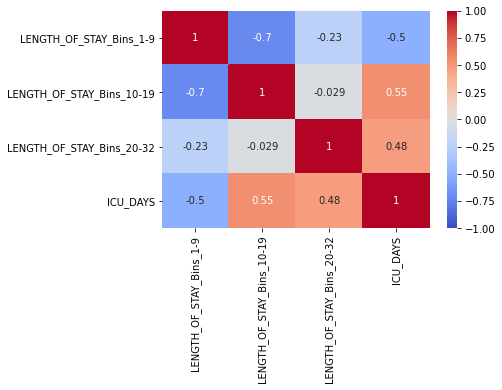

In [137]:
feature_cols = ['LENGTH_OF_STAY_Bins_1-9','LENGTH_OF_STAY_Bins_10-19','LENGTH_OF_STAY_Bins_20-32','ICU_DAYS']

Y =   df['readmit_number']
X =   df[feature_cols]

cmap = sns.color_palette('coolwarm', as_cmap=True)

correlations = X.corr()
print(correlations)
print(sns.heatmap(correlations, vmin=-1, vmax=1, annot=True, cmap=cmap))

Based on the correlation coefficients, the correlations are not too high between ICU days and length of stay.

In [138]:
df.head(1)

,ENCOUNTER_KEY,PATIENT_NUMBER,gender,race_cd,PatientAge,Diagnosis_Group,icd9_target,MS_DRG_CODE,MS_DRG_DESC,DRG_APR_CODE,DRG_APR_DESC,DRG_APR_SEVERITY,DIAGNOSIS_SUBCAT_CODE,DIAGNOSIS_SUBCAT_DESC,DIAGNOSIS_ICD_CODE,DIAGNOSIS_LONG_DESC,PROCEDURE_SUBCAT_CODE,PROCEDURE_SUBCAT_DESC,PROCEDURE_ICD_CODE,PROCEDURE_LONG_DESC,dx_code,dx_group,DOCTOR,ADMIT_DATE,DISCHARGE_DATE,readmit_date,readmit_discharge_date,readmit_days,LENGTH_OF_STAY,ICU_DAYS,DISCHARGED_TO,op_visits6,Standard_Orders_Used,Num_Chronic_Cond,Disch_Nurse_ID,admit_month,readmit_month,order_set_used,order_total_charges,readmit_number,operationcount,HOSPITAL,ZIP,STATECODE,City,County_name,i,PatientAge_Bins,LENGTH_OF_STAY_Bins,PatientAge_Bins_20-39,PatientAge_Bins_40-59,PatientAge_Bins_60-79,PatientAge_Bins_80-101,LENGTH_OF_STAY_Bins_1-9,LENGTH_OF_STAY_Bins_10-19,LENGTH_OF_STAY_Bins_20-32,readmit_days_01-07,readmit_days_08-30,readmit_days_31-60,gender_F,race_Black,race_White,Diagnosis_Group_CHF,Diagnosis_Group_COPD,DRG_APR_SEVERITY_1.0,DRG_APR_SEVERITY_2.0,DRG_APR_SEVERITY_3.0,DRG_APR_SEVERITY_4.0,DISCHARGED_TO_AGNST MEDICAL ADVICE AMA,DISCHARGED_TO_CHG TO LTAC,DISCHARGED_TO_HOME HEALTH AGENCY,DISCHARGED_TO_HOSPICE (HOME),DISCHARGED_TO_HOSPICE - MEDICAL INPAT,DISCHARGED_TO_INTERMEDIATE CARE,DISCHARGED_TO_OTHER ACUTE HOSP,DISCHARGED_TO_OTHER DEATH,DISCHARGED_TO_REHAB HOSPITAL,"DISCHARGED_TO_ROUTINE DSCHG, HOME",DISCHARGED_TO_SKILLED NURSING FACILITY,readmit_month_1.0,readmit_month_2.0,readmit_month_3.0,readmit_month_4.0,readmit_month_5.0,readmit_month_6.0,readmit_month_7.0,readmit_month_8.0,readmit_month_9.0,readmit_month_10.0,readmit_month_11.0,readmit_month_12.0,HOSPITAL_Delaware County Hospital,HOSPITAL_Hilding-Long Memorial Hospital,HOSPITAL_Independence Medical Center,HOSPITAL_Mercy Hospital,HOSPITAL_Oxbow Regional Hospital,HOSPITAL_St. Anthony Medical Center,HOSPITAL_Superior-Parkland Hospital,HOSPITAL_Valley City Regional Hospital,STATECODE_IA,STATECODE_MN,STATECODE_ND,STATECODE_WI,DIAGNOSIS_SUBCAT_DESC_ACUTE MYOCARDIAL INFARCT,DIAGNOSIS_SUBCAT_DESC_ASTHMA,DIAGNOSIS_SUBCAT_DESC_BRONCHIECTASIS,DIAGNOSIS_SUBCAT_DESC_BRONCHOPNEUMONIA ORGANI,DIAGNOSIS_SUBCAT_DESC_CHRONIC AIRWAY OBSTRUCTI,DIAGNOSIS_SUBCAT_DESC_CHRONIC BRONCHITIS,DIAGNOSIS_SUBCAT_DESC_CHRONIC Hosp 46 HEART,DIAGNOSIS_SUBCAT_DESC_DISEASES DUE TO OTHER MY,DIAGNOSIS_SUBCAT_DESC_DISORDERS OF FLUID ELEC,DIAGNOSIS_SUBCAT_DESC_EMPHYSEMA,DIAGNOSIS_SUBCAT_DESC_HEART FAILURE,DIAGNOSIS_SUBCAT_DESC_HYPERTENSIVE HEART AND C,DIAGNOSIS_SUBCAT_DESC_HYPERTENSIVE HEART DISEA,DIAGNOSIS_SUBCAT_DESC_OTHER AND UNSPECIFIED DI,DIAGNOSIS_SUBCAT_DESC_OTHER BACTERIAL PNEUMONI,DIAGNOSIS_SUBCAT_DESC_OTHER RHEUMATIC HEART DI,DIAGNOSIS_SUBCAT_DESC_PNEUMOCOCCAL PNEUMONIA,DIAGNOSIS_SUBCAT_DESC_PNEUMONIA DUE TO OTHER S,DIAGNOSIS_SUBCAT_DESC_PNEUMONIA ORGANISM UNSP,DIAGNOSIS_SUBCAT_DESC_SEPTICEMIA,DIAGNOSIS_SUBCAT_DESC_SYMPTOMS CONCERNING NUTR,DIAGNOSIS_SUBCAT_DESC_VIRAL PNEUMONIA
0,105241297,9921901297,M,White,50,COPD,0,192,CHRONIC OBSTRUCTIVE Hosp 46 DISEASE W/O CC/MCC,140,CHRONIC OBSTRUCTIVE Hosp 46 DISEASE,1,491,CHRONIC BRONCHITIS,491.21,OBSTRUCTIVE CHRONIC BRONCHITIS WITH ACUTE EXAC...,99,OTHER NONOPERATIVE PROCE,99.23,INJECTION OF STEROID,49121,Obstructive chronic bronchitis,303334,2014-12-15,2014-12-21,M,M,M,6,4,"ROUTINE DSCHG, HOME",8,Y,1.0,350014,12,M,1,29507,0,0,Delaware County Hospital,52057,IA,Manchester,Delaware,5,40-59,1-9,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


I will run another correlation on specific variables that may seem questionable, as far as their relationships.

In [139]:
feature_cols = ['ICU_DAYS','readmit_days_01-07','readmit_days_08-30','readmit_days_31-60',
               'Diagnosis_Group_CHF','Diagnosis_Group_COPD','DRG_APR_SEVERITY_1.0',
               'DRG_APR_SEVERITY_2.0','DRG_APR_SEVERITY_3.0','DRG_APR_SEVERITY_4.0']

Y =   df['readmit_number']
X =   df[feature_cols]

#cmap = sns.color_palette('coolwarm', as_cmap=True)

correlations = X.corr()
print(correlations)
#print(sns.heatmap(correlations, vmin=-1, vmax=1, annot=True, cmap=cmap))

                      ICU_DAYS  readmit_days_01-07  readmit_days_08-30  \
ICU_DAYS              1.000000           -0.023800            0.007165   
readmit_days_01-07   -0.023800            1.000000           -0.072624   
readmit_days_08-30    0.007165           -0.072624            1.000000   
readmit_days_31-60   -0.034730           -0.034944           -0.038935   
Diagnosis_Group_CHF  -0.027903           -0.032018           -0.002769   
Diagnosis_Group_COPD -0.006113           -0.026890           -0.025857   
DRG_APR_SEVERITY_1.0 -0.089605           -0.029402           -0.000686   
DRG_APR_SEVERITY_2.0 -0.158298           -0.013457            0.017087   
DRG_APR_SEVERITY_3.0  0.102852            0.026895           -0.013326   
DRG_APR_SEVERITY_4.0  0.172077            0.003434           -0.004501   

                      readmit_days_31-60  Diagnosis_Group_CHF  \
ICU_DAYS                       -0.034730            -0.027903   
readmit_days_01-07             -0.034944            -0.

## Export Data

In [140]:
df.to_csv("Hospital_Readmissions.csv")